##Modules Needed for this project 


In [128]:
import time
import datetime
import pandas as pd 
import plotly.graph_objs as go
import matplotlib.pyplot as plt


##Extraction of Data direct form source which is yahoo finance


In [129]:
#first we need to decide what ticker we need to get data from YAHOO finance 
ticker = 'FB'


#time.mktime() method of Time module is used to convert a time. struct_time object or a tuple containing 9 elements corresponding to time. struct_time object to time in seconds passed since epoch in local time.
period1 = int(time.mktime(datetime.datetime(2010, 12, 1, 23, 59).timetuple()))#starting 
period2 = int(time.mktime(datetime.datetime(2021, 10, 31, 23, 59).timetuple()))#ending

#We need to pick interval. 
interval = '1d' # one enrty in data frame represent one day. we can also pick 5d,3m,6m,1y,5y,ytd

#here we plug in veriables with help of fsting 
stock_data_1d= f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

#here we use pandas.read_csv method to read data 
stock_data1d_df = pd.read_csv(stock_data_1d)
print(stock_data1d_df.head())



         Date       Open       High        Low      Close  Adj Close     Volume
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000  573576400
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999  168192700
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000  101786600
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   73600000
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   50237200


## Data cleaning  and handeling null values


In [130]:
#lets check shape and null valus in data set 
total = stock_data1d_df.isnull().sum().sort_values(ascending=False)
percent = (stock_data1d_df.isnull().sum())/stock_data1d_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
Volume,0,0.0
Adj Close,0,0.0
Close,0,0.0
Low,0,0.0
High,0,0.0
Open,0,0.0
Date,0,0.0


In [131]:
#lets see the data types of the data 
stock_data1d_df.dtypes 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [132]:
#lets change the index to date 
stock_data1d_df  = stock_data1d_df.set_index(pd.DatetimeIndex(stock_data1d_df['Date'].values))

print(stock_data1d_df)

                  Date        Open  ...   Adj Close     Volume
2012-05-18  2012-05-18   42.049999  ...   38.230000  573576400
2012-05-21  2012-05-21   36.529999  ...   34.029999  168192700
2012-05-22  2012-05-22   32.610001  ...   31.000000  101786600
2012-05-23  2012-05-23   31.370001  ...   32.000000   73600000
2012-05-24  2012-05-24   32.950001  ...   33.029999   50237200
...                ...         ...  ...         ...        ...
2021-10-25  2021-10-25  320.299988  ...  328.690002   38409000
2021-10-26  2021-10-26  328.260010  ...  315.809998   65654000
2021-10-27  2021-10-27  314.190002  ...  312.220001   29971800
2021-10-28  2021-10-28  312.989990  ...  316.920013   50806800
2021-10-29  2021-10-29  320.190002  ...  323.570007   37059400

[2379 rows x 7 columns]


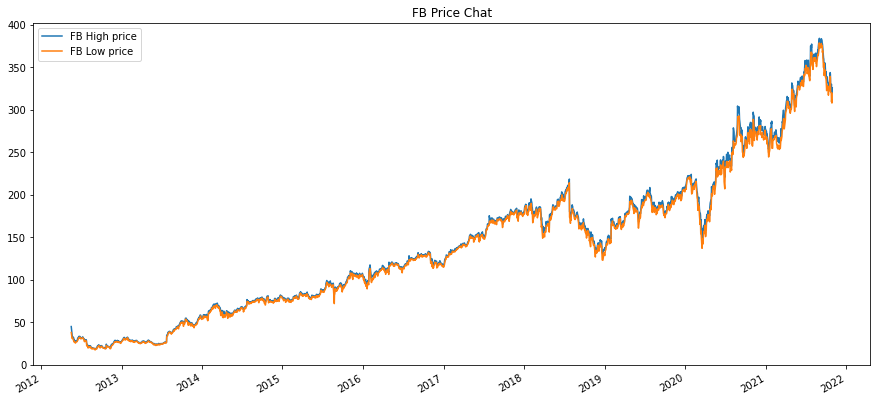

In [123]:
#lets visualize some stock price opening and closing 
stock_data1d_df['High'].plot(label=f'{ticker} High price',figsize=(15,7))
stock_data1d_df['Low'].plot(label = f'{ticker} Low price')
Y = stock_data1d_df['Date']
plt.plot(ydate=stock_data1d_df['Date'])
plt.title(f'{ticker} Price Chat')
plt.legend()
plt.show()

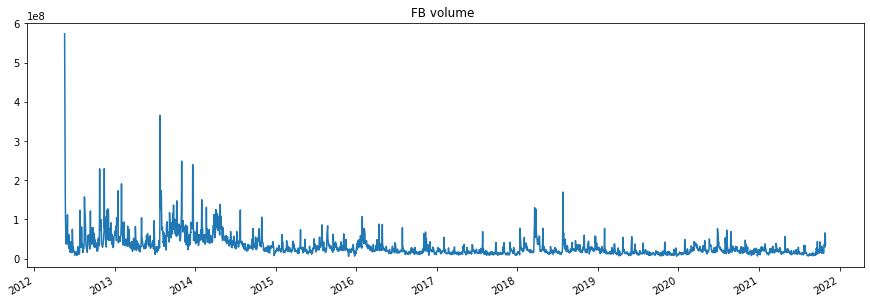

In [124]:
# lets see the volume 
stock_data1d_df['Volume'].plot(label='Volume',figsize=(15,5))
plt.title(f'{ticker} volume ')
plt.show()

## Lets create a 50 day moveing average 
Moving averages are usually calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following—or lagging—indicator because it is based on past prices. The longer the time period for the moving average, the greater the lag.
###Note: Moving average should set depending on size of the data. 

In [125]:
# lets create new columns called MA50,MA10

stock_data1d_df['MA50'] = stock_data1d_df['Open'].rolling(50).mean()
stock_data1d_df['MA100'] = stock_data1d_df['Open'].rolling(100).mean()
stock_data1d_df.head(51) # notice it gives us NaN values becuse it takeing mean of 50&10 data entries 


,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100
2012-05-18,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN
2012-05-21,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN,NaN
2012-05-22,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN,NaN
2012-05-23,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN,NaN
2012-05-24,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN,NaN
2012-05-25,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800,NaN,NaN
2012-05-29,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400,NaN,NaN
2012-05-30,2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900,NaN,NaN
2012-05-31,2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200,NaN,NaN
2012-06-01,2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500,NaN,NaN


## Lets visualize How moving average cancel out the noise 

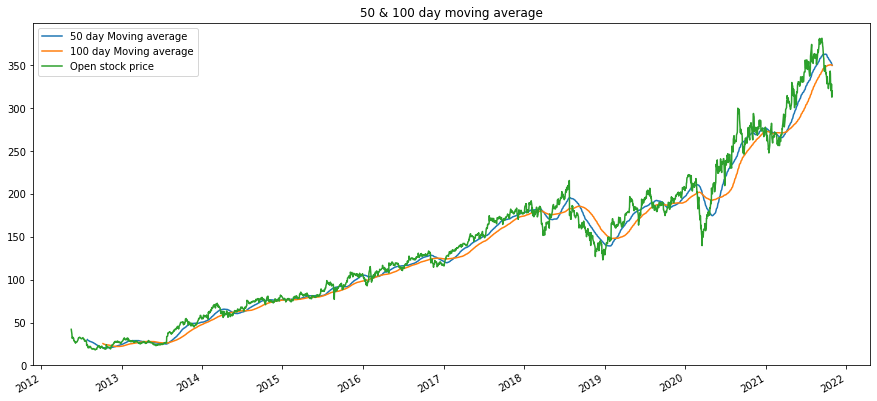

In [126]:
#lets plot and see how moving averages cancels outs the noise 
stock_data1d_df['MA50'].plot(label='50 day Moving average',figsize=(15,7))
stock_data1d_df['MA100'].plot(label='100 day Moving average')
stock_data1d_df['Open'].plot(label ='Open stock price')

plt.title('50 & 100 day moving average')
plt.legend()
plt.show()


## Volitilty of stock⚡

In [133]:
# lets make new colum
stock_data1d_df['volatility'] =  (stock_data1d_df['Close']/stock_data1d_df['Close'].shift(1))-1

In [134]:
stock_data1d_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,volatility
2012-05-18,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN
2012-05-21,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.109861
2012-05-22,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.089039
2012-05-23,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.032258
2012-05-24,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.032187


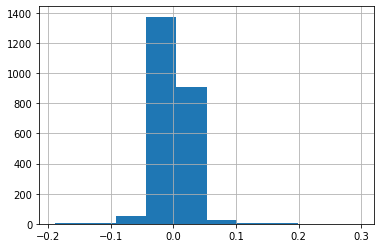

In [141]:
#lets visualize the volatility 
stock_data1d_df['volatility'].hist() #the more wider the histogram more volatility 
plt.show()